### EDA para definir etapas de Limpeza e Tipagem das tranformações de staging
### Não automatizado
   ```sh
   pip install seaborn 
   ```

In [1]:
import pandas as pd

localRawDataPath = "cgu_terceirizados_local/year=2024/raw_data.xlsx"
maio = pd.read_excel(localRawDataPath, engine='openpyxl')

In [2]:
maio.head(1)

,id_terc,sg_orgao_sup_tabela_ug,cd_ug_gestora,nm_ug_tabela_ug,sg_ug_gestora,nr_contrato,nr_cnpj,nm_razao_social,nr_cpf,nm_terceirizado,...,nm_unidade_prestacao,vl_mensal_salario,vl_mensal_custo,Num_Mes_Carga,Mes_Carga,Ano_Carga,sg_orgao,nm_orgao,cd_orgao_siafi,cd_orgao_siape
0,8761995,MCOM,413007,AGENCIA NACIONAL DE TELECOMUNICACOES PE,ANATEL-PE,00037/2021,19232342000165,PROACAO SEGURANCA PRIVADA LTD,***.527.284-**,TIAGO MARTINS,...,ANATEL PE,2524,5838,5,MAIO,2024,ANATEL,AGENCIA NACIONAL DE TELECOMUNICACOES,41231,41231


In [4]:
pd.DataFrame(maio.dtypes).transpose()

,id_terc,sg_orgao_sup_tabela_ug,cd_ug_gestora,nm_ug_tabela_ug,sg_ug_gestora,nr_contrato,nr_cnpj,nm_razao_social,nr_cpf,nm_terceirizado,...,nm_unidade_prestacao,vl_mensal_salario,vl_mensal_custo,Num_Mes_Carga,Mes_Carga,Ano_Carga,sg_orgao,nm_orgao,cd_orgao_siafi,cd_orgao_siape
0,int64,object,int64,object,object,object,int64,object,object,object,...,object,int64,int64,int64,object,int64,object,object,int64,int64


In [5]:
pd.DataFrame(maio.isnull().sum()).transpose()

,id_terc,sg_orgao_sup_tabela_ug,cd_ug_gestora,nm_ug_tabela_ug,sg_ug_gestora,nr_contrato,nr_cnpj,nm_razao_social,nr_cpf,nm_terceirizado,...,nm_unidade_prestacao,vl_mensal_salario,vl_mensal_custo,Num_Mes_Carga,Mes_Carga,Ano_Carga,sg_orgao,nm_orgao,cd_orgao_siafi,cd_orgao_siape
0,0,0,0,0,2819,0,0,0,0,1,...,47,0,0,0,0,0,0,0,0,0


In [6]:
text_columns = maio.select_dtypes(include=['object']).columns
for col in text_columns:
    value_counts = maio[col].value_counts()
    print(f'Número de valores distintos coluna {col}: {value_counts.shape[0]}')

Número de valores distintos coluna sg_orgao_sup_tabela_ug: 20
Número de valores distintos coluna nm_ug_tabela_ug: 479
Número de valores distintos coluna sg_ug_gestora: 393
Número de valores distintos coluna nr_contrato: 1240
Número de valores distintos coluna nm_razao_social: 1622
Número de valores distintos coluna nr_cpf: 68006
Número de valores distintos coluna nm_terceirizado: 71058
Número de valores distintos coluna nm_categoria_profissional: 567
Número de valores distintos coluna nm_escolaridade: 54
Número de valores distintos coluna nr_jornada: 22
Número de valores distintos coluna nm_unidade_prestacao: 5089
Número de valores distintos coluna Mes_Carga: 1
Número de valores distintos coluna sg_orgao: 72
Número de valores distintos coluna nm_orgao: 72


In [17]:
maio['nr_jornada'].value_counts()

nr_jornada
44      41412
40      11494
30       7840
41       5929
36       4152
48       1636
20        556
22        339
42        295
25        110
45         38
84         25
10         23
15          5
NI          5
35          4
26          2
37          1
28          1
27          1
23          1
11          1
Name: count, dtype: int64

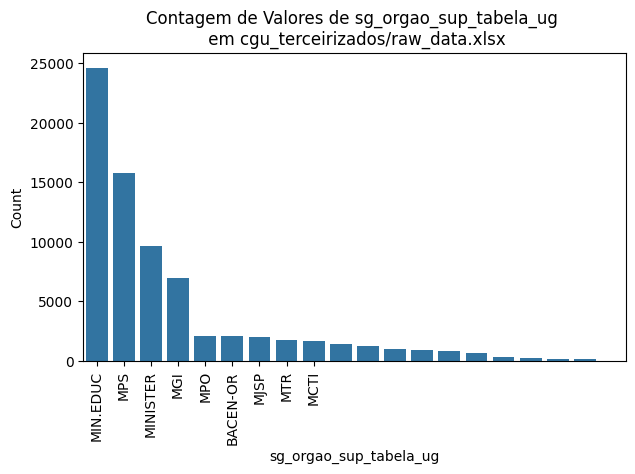

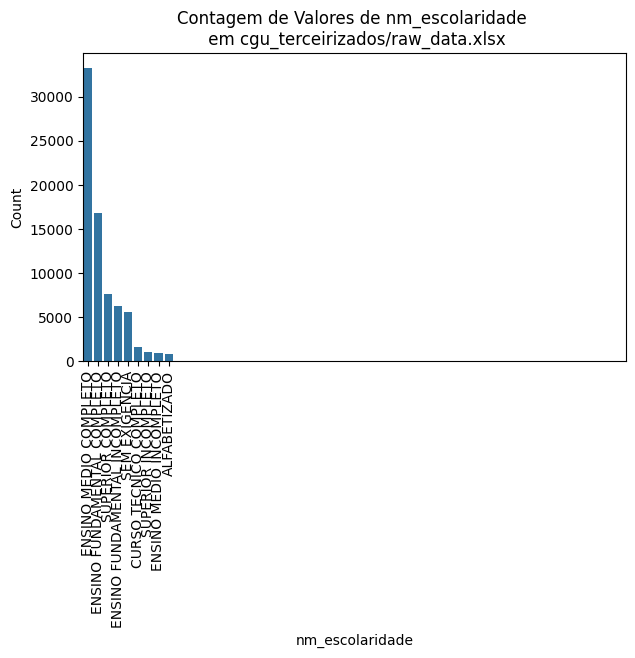

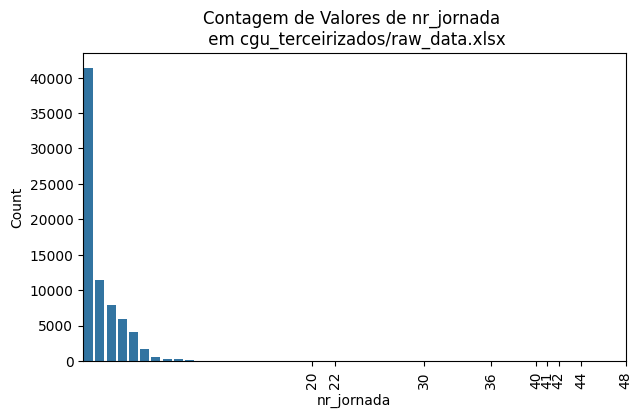

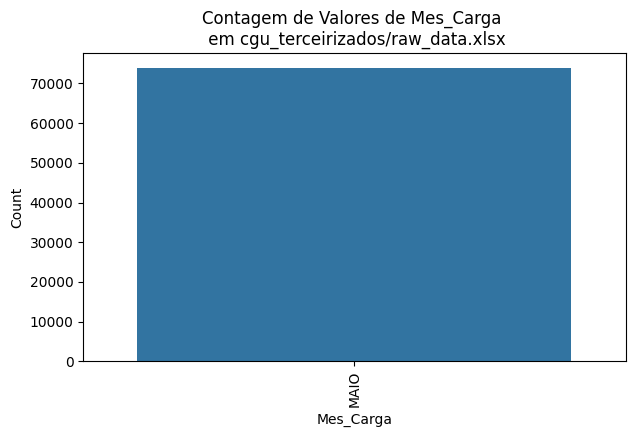

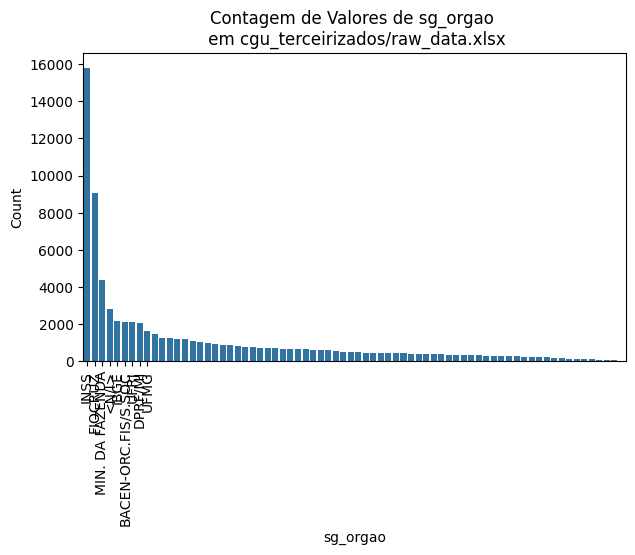

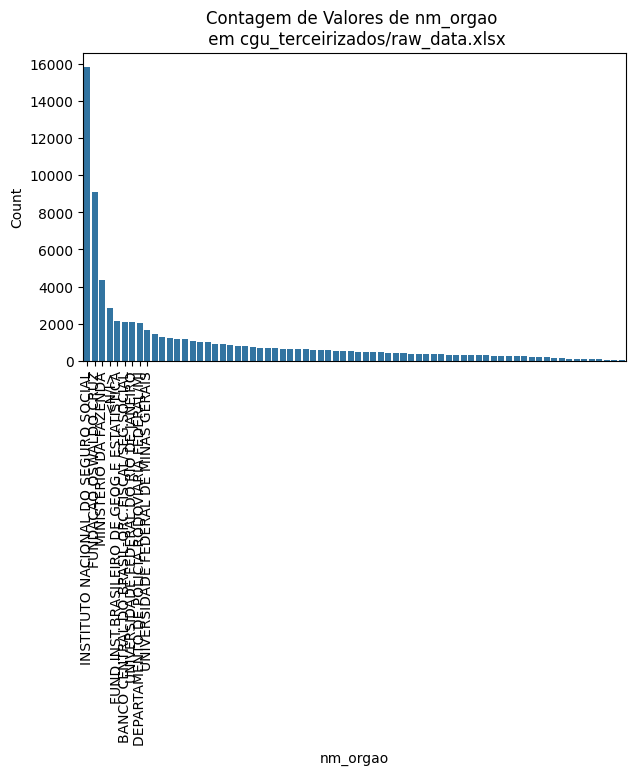

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Get the list of columns that are of type object (text columns)
columns = ["sg_orgao_sup_tabela_ug", 
            #'nm_ug_tabela_ug', 'sg_ug_gestora', "nm_categoria_profissional",
            "nm_escolaridade", "nr_jornada",
            "Mes_Carga", "sg_orgao", "nm_orgao"]
for col in columns:
    # Get the value counts for the specified column
    value_counts = maio.reset_index()[col].value_counts()
    
    # Determine the most frequent value
    most_frequent_value = value_counts.index[0]

    # Create a smaller bar plot using Seaborn
    plt.figure(figsize=(7, 4))  # Reduce the figure size
    ax = sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Contagem de Valores de {col} \n em cgu_terceirizados/raw_data.xlsx')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    ax.set_xticks(value_counts.index[:4])
    ax.set_xticklabels(value_counts.index[:4], rotation=45)    
    plt.show()